In [4]:
# Import Pytorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets # We'll use datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check the versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


### 1 Getting a data set

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [5]:
# Setup training data
from torchvision import  datasets

train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # Do we want the training dataset?
    download=True, # Do we want to download?
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data?
    target_transform=None # How do we want to transform the labels?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.81MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first train example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

#### 1.1 check input and output shapes of data

In [11]:
# Checking the image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


#### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

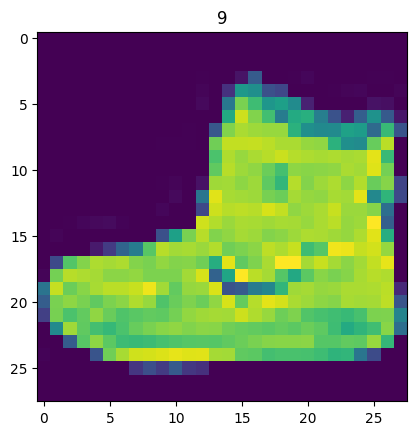

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
#image
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

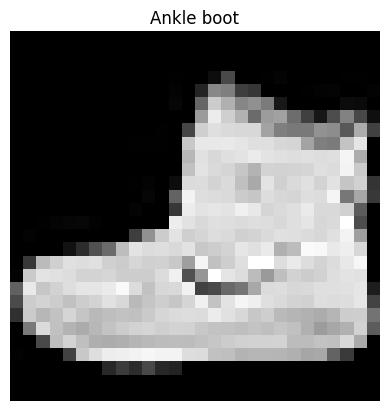

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

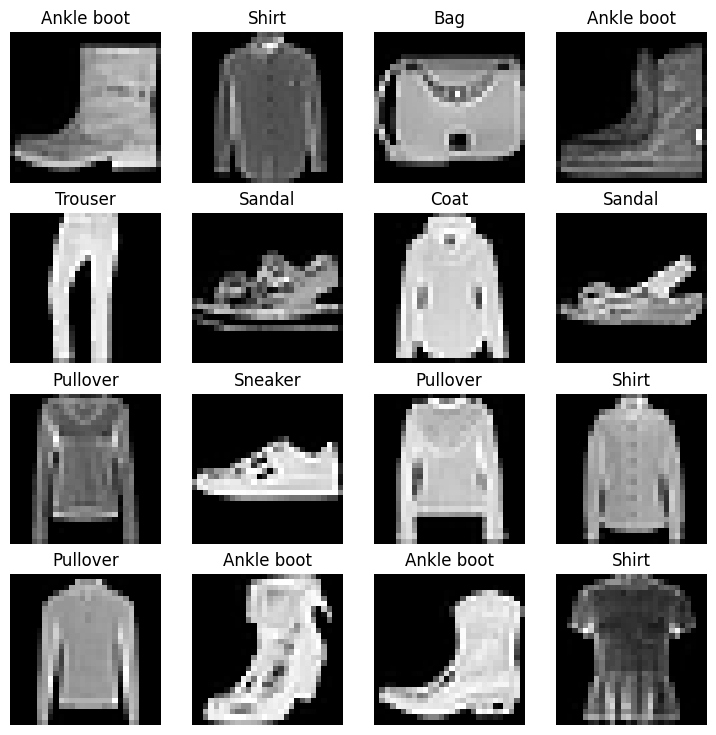

In [14]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

### 2 Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our datasets into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It's more computationally efficent, as in, your computing hardware may not be able to look (store in memory) at 6'000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE=32

# Tur datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7df4872d5ed0>,
 <torch.utils.data.dataloader.DataLoader at 0x7df4872aeed0>)

In [16]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train dataloader {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenght of train dataloader {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7df4872d5ed0>, <torch.utils.data.dataloader.DataLoader object at 0x7df4872aeed0>)
Lenght of train dataloader 1875 batches of 32
Lenght of train dataloader 313 batches of 32


In [17]:
# Check out what's inside the trainin dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
# train_features_batch.shape will return the batch_size, color_channel, high, width
# train_labels_batch.shape will return the number of labels

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: torch.Size([]), label size: torch.Size([])


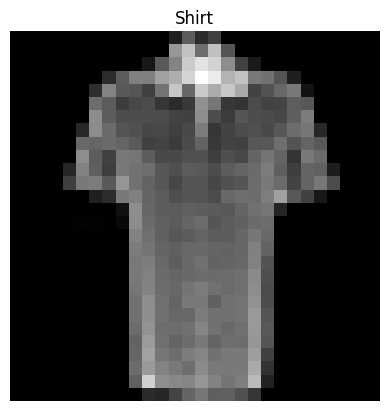

In [18]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label.shape}, label size: {label.shape}")

### 3 Model 0: Build a baseline model

Whetn starting to build a series of machine learning modellint experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you'll try and improve upon with subsequent models/experiments.

In other words: Start simply and add complexity when necessary

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# torch.Size([1, 28, 28])

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happend
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units
        ),
        nn.Linear(
            in_features=hidden_units,
            out_features=output_shape
        )
    )
  def forward(self, x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
  input_shape=784, # 28*28
  hidden_units=10, # how many units in the hidden layer
  output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x).shape
# torch.Size([1, 10])
# One logit per class

torch.Size([1, 10])

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` for Stochastic Gradient Descent
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not alreay downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(requests.content)

In [25]:
# Import accuracy metric
from helper_function import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

#### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [26]:
from timeit import default_timer as timer
# Measure execution time of small code snippets

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  """
  Prints difference between start and end time.
  """

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [27]:
start_time = timer()
# Some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.7152999990676108e-05

#### 3.3 Creating a training loop an training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all (for fun)

In [28]:
# Import tqdm, this library give the progress bar. It works in Python and CLI. Usually use to see epoch progress
from tqdm.auto import tqdm

# Set the seed and starts the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs(we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------")

  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    # 3. Optimizer the zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimize the step
    optimizer.step()

  # Print out what's happenin'
  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

# Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculte accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\n Train {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------

 Train 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1 
------

 Train 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2 
------

 Train 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 24.199 seconds


### 4 Make predictions and get Model 0 results

In [29]:
def eval_model(model, data_loader, loss_fn, accuracy_fn, device):
    """
    Evaluates the model on a given dataset.

    Args:
        model: The model to evaluate.
        data_loader: DataLoader for the dataset.
        loss_fn: Loss function.
        accuracy_fn: Accuracy function.
        device: Device to use for computation (e.g., 'cpu' or 'cuda').

    Returns:
        dict: A dictionary containing the loss and accuracy.
    """
    model.eval()  # Set the model to evaluation mode
    model.to(device)  # Move the model to the specified device
    loss, acc = 0, 0

    with torch.inference_mode():
        for X, y in data_loader:
            # Move data to the same device as the model
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_pred = model(X)

            # Accumulate loss
            loss += loss_fn(y_pred, y).item()

            # Accumulate accuracy
            acc += accuracy_fn(y_true=y, y_pred=y_pred)

    # Average loss and accuracy over all batches
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # Only works when model was created with a class
          "model_loss": loss,
          "model_acc": acc}


In [65]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663889868190873,
 'model_acc': 83.42651757188499}

## 5 Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
!nvidia-smi

In [34]:
torch.cuda.is_available()

True

In [35]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6 Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02

In [36]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                 out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor()):
    return self.layer_stack(x)

In [37]:
# Create a instace of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the fltten layer: 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [38]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop -`test_step()`

In [39]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """
  Performs a training with model trying to learn on data_loader
  """

  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()
  model.to(device)
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data into target device

    X, y = X.to(device), y.to(device)
    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred) # go from logits to prediction labels

    # 3. Optimizer the zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimize the step
    optimizer.step()

  # Print out what's happenin'
  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

# Divide total train loss and acc by lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [40]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Performs a testing loop step on model going over data_loader.
  """
  test_loss, test_acc = 0,0
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      # Send the data to the target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass (output raw logits)
      test_pred = model(X_test)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1)) # logits -> prediction

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% /n")

In [60]:
def accuracy_fn(y_true, y_pred):
    """
    Computes accuracy between y_true and y_pred.
    """
    if len(y_pred.shape) == 1:  # Caso binario
        y_pred_labels = (y_pred > 0.5).int()
    else:  # Caso multiclase
        y_pred_labels = torch.argmax(y_pred, dim=1)
    correct = torch.eq(y_true, y_pred_labels).sum().item()
    acc = (correct / len(y_pred_labels)) * 100
    return acc


In [42]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_ste() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 18.63% /n
Epoch: 1 
------------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 17.80% /n
Epoch: 2 
------------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 18.86% /n
Train time on cuda: 29.184 seconds


In [43]:
# Calculate model 0 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

In [44]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009789101232,
 'model_acc': 75.01996805111821}

## 7 Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also know ConvNets
CNN's are know for their capabilities to find patterns in visual data


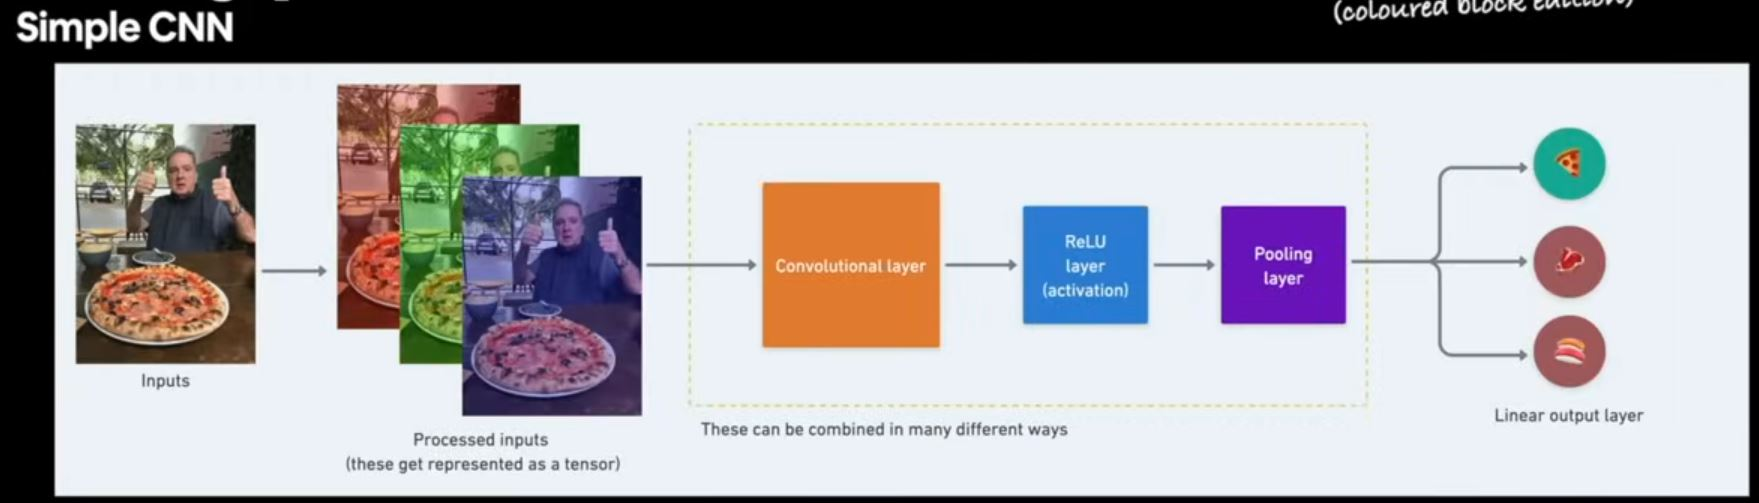

In [45]:
# Create a convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # The flatten will be before the linear layer but after de convolutional layers
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7, # There's a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

We can calculate the in_features of `nn.Linear` by hand with H_out and W_out

In [46]:
image.shape

torch.Size([1, 28, 28])

In [47]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [48]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through `nn.Conv2d()`


In [49]:
torch.manual_seed(42)

# Create a batch of iamges
images = torch.randn(size=(31,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([31, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [50]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [51]:
test_image.shape

torch.Size([3, 64, 64])

In [52]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max pool layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max pool layer: torch.Size([1, 10, 32, 32])


In [53]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\n Random tensor: \n {random_tensor}")
print(f"\n Random tensor shape: \n {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor to the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool tensor: \n {max_pool_tensor}")
print(f"Max pool shape: {max_pool_tensor.shape}")
max_pool_tensor


 Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Random tensor shape: 
 torch.Size([1, 1, 2, 2])

 Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367]]]])

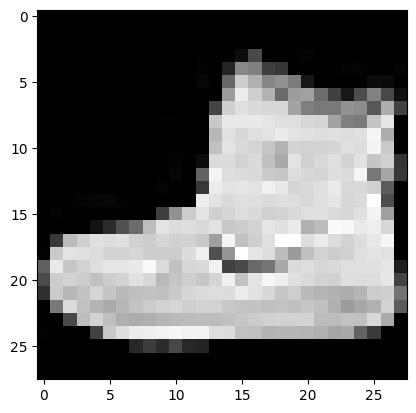

In [54]:
plt.imshow(image.squeeze(), cmap="gray")

In [55]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor

tensor([[[ 1.7878e+00, -4.7805e-01, -2.4286e-01, -9.3416e-01, -2.4826e-01,
          -1.2082e+00, -4.7767e-01,  5.2013e-01, -1.5673e+00, -2.3945e-01,
           2.3228e+00, -9.6337e-01,  2.0024e+00,  4.6643e-01,  1.5730e+00,
          -9.2283e-01,  3.5586e-01, -6.8662e-01, -4.9336e-01,  2.4149e-01,
          -1.1109e+00,  9.1546e-02, -2.3169e+00, -2.1680e-01, -3.0973e-01,
          -3.9571e-01,  8.0341e-01, -6.2160e-01],
         [-5.9200e-01, -6.3074e-02, -8.2855e-01,  3.3090e-01,  3.4912e-02,
           3.2110e-01,  1.5736e+00, -8.4547e-01,  1.3123e+00,  6.8716e-01,
          -1.0892e+00, -3.5529e-01, -1.4181e+00,  8.9627e-01,  4.9905e-02,
           2.2667e+00,  1.1790e+00, -4.3445e-01, -1.3864e+00, -1.2862e+00,
          -8.3712e-01, -9.2239e-01,  1.8113e+00,  1.6056e-01,  3.6725e-01,
           1.7541e-01,  1.3852e+00, -4.4585e-01],
         [-1.2024e+00,  7.0781e-01, -1.0759e+00,  5.3565e-01,  1.1754e+00,
           5.6117e-01, -4.5275e-01, -7.7178e-01,  1.4534e-01,  2.3105e-01,


In [56]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [57]:
# Setup loss function/eval metrics/optimizer
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using our training and test functions

In [61]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n -------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 -------
Train loss: 0.59648 | Train acc: 78.30%
Test loss: 0.38883 | Test acc: 18.54% /n
Train time on cuda: 15.760 seconds
Epoch: 1 
 -------
Train loss: 0.36408 | Train acc: 86.81%
Test loss: 0.36262 | Test acc: 17.69% /n
Train time on cuda: 27.035 seconds
Epoch: 2 
 -------
Train loss: 0.32505 | Train acc: 88.22%
Test loss: 0.33110 | Test acc: 18.40% /n
Train time on cuda: 38.236 seconds


In [62]:
# Call eval_model
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3310999762231169,
 'model_acc': 88.03913738019169}

In [66]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663889868190873,
 'model_acc': 83.42651757188499}

## 8 Compare model results and training time

In [67]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.331100,88.039137


In [68]:
# Add training time to results comparision
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,24.199500
1,FashionMNISTModelV1,0.685001,75.019968,29.183508
2,FashionMNISTModelV2,0.331100,88.039137,38.236318


Text(0, 0.5, 'model')

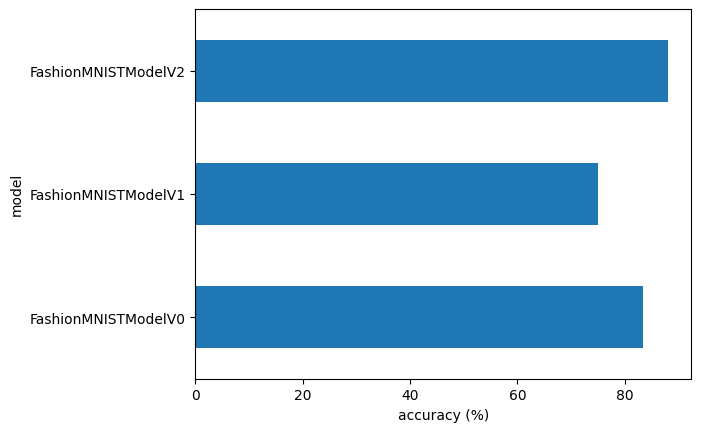

In [69]:
# Visualiza our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9 Make and evaluate random predictions with best model

In [70]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [71]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

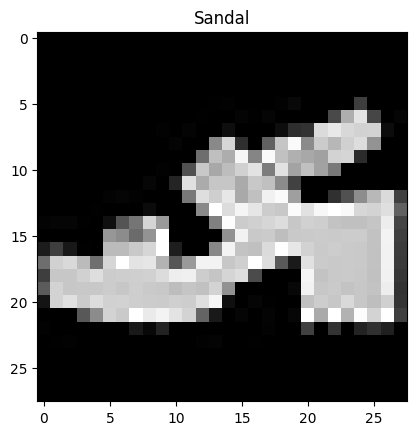

In [72]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [73]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two predictions probabilities
pred_probs[:2]

tensor([[2.1233e-07, 5.1639e-08, 1.4680e-07, 1.6462e-07, 3.2860e-07, 9.9972e-01,
         9.7869e-07, 1.1774e-05, 2.7089e-05, 2.4300e-04],
        [1.1827e-02, 9.0443e-01, 8.4524e-04, 2.8891e-02, 8.8754e-03, 7.3534e-05,
         4.4814e-02, 1.2065e-04, 8.4566e-05, 3.7540e-05]])

In [74]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [75]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

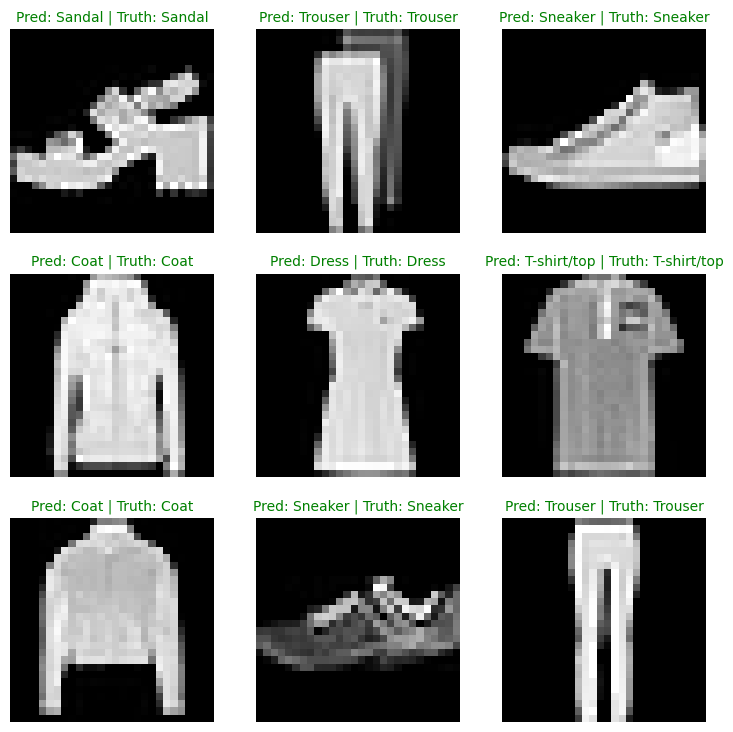

In [76]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for the equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c="g") # Green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 10 Confussion Matrix

A confussion matrix is a fantastic way of evaluating your classification models

1. Make predictions with our trained model on the best dataset
2. Make a confussion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [77]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction lbels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [78]:
# See if required package are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mxltend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4
mlxtend version: 0.23.4


In [79]:
!pip install mlxtend

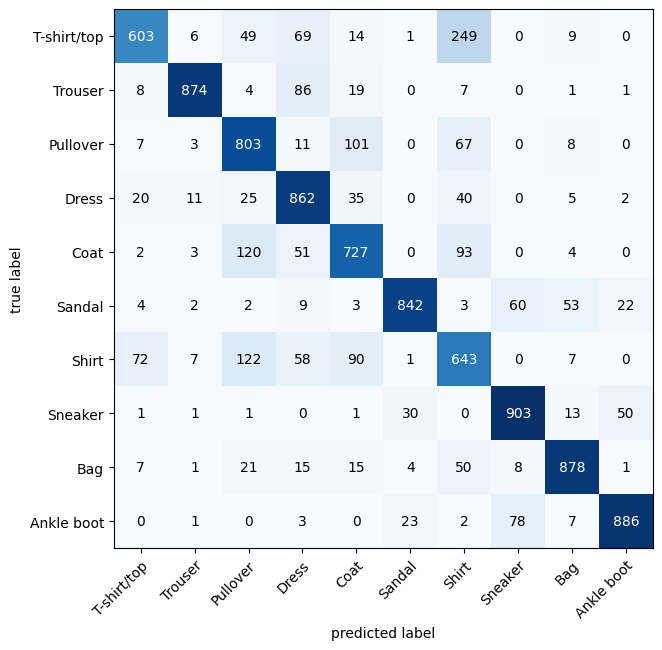

In [80]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes = len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplot.lib likes work with numpy
    class_names=class_names,
    figsize=(10,7)
)

In [81]:
confmat_tensor

tensor([[603,   6,  49,  69,  14,   1, 249,   0,   9,   0],
        [  8, 874,   4,  86,  19,   0,   7,   0,   1,   1],
        [  7,   3, 803,  11, 101,   0,  67,   0,   8,   0],
        [ 20,  11,  25, 862,  35,   0,  40,   0,   5,   2],
        [  2,   3, 120,  51, 727,   0,  93,   0,   4,   0],
        [  4,   2,   2,   9,   3, 842,   3,  60,  53,  22],
        [ 72,   7, 122,  58,  90,   1, 643,   0,   7,   0],
        [  1,   1,   1,   0,   1,  30,   0, 903,  13,  50],
        [  7,   1,  21,  15,  15,   4,  50,   8, 878,   1],
        [  0,   1,   0,   3,   0,  23,   2,  78,   7, 886]])

##  11 Save and load best performing model

In [83]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [85]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Loaded in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

<ipython-input-85-213bacb0faf2>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [88]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3310999762231169,
 'model_acc': 88.03913738019169}

In [89]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3310999762231169,
 'model_acc': 88.03913738019169}

In [92]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08)

tensor(True)